# Datenanalyse mit KI & Machine Learning
## Klassifikation mit KNN

# Datenanalyse mit KI & Machine Learning
## Klassifikation mit KNN

<h3>KNN steht für <b>k-nächste Nachbarn</b><br></h3>
<p>Es handelt sich hierbei um keine Regression, bei der Werte ausgerechnet werden, sondern um <b>Klassifikation</b>, bei der Entitäten (Zeilen) passende Klassen (Werte aus y) zugeordnet werden.</p>
<p>Die Zugehörigkeit von Punkten zu Klassen und damit zu Clustern wird über eine
gewisse Anzahl von Nachbarn aus einer Klasse gesteuert.</p>
<p>Sagen wir, dass z.B. die 3 nächsten Nachbarn die Zugehörigkeit bestimmen,
dann wird unser Modell bei jedem Punkt schauen, welches die nächsten drei Punkte sind
und je nach ihrer Klassenzugehörigkeit dem aktuellen Punkt ein Label verpassen.</p>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
	classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd

In [3]:
# Mit make_classification erstellen wir Daten, die eine gewählte Anzahl Cluster
# enthalten

In [4]:
# Fall 1: Klar getrennte Cluster erzeugen (und danach mit KNN finden):
X, y = make_classification(
	n_samples=200,
	n_features=2,
	n_informative=2,
	n_redundant=0,
	n_clusters_per_class=1,
	class_sep=3,
	random_state=42
)

In [5]:
# Datenpunkte:
X

array([[ 1.12707102,  2.013042  ],
       [ 3.31293463,  4.77053357],
       [ 4.34042818,  4.42099601],
       [ 4.29454774,  1.59561981],
       [ 2.94410516,  2.4772409 ],
       [-2.11959689,  2.50891314],
       [ 2.1510847 ,  2.81007677],
       [-2.00745441,  1.54715744],
       [-3.25396925,  2.06769236],
       [-2.24392415,  3.19979806],
       [-3.9208928 ,  4.9189499 ],
       [-1.51193731,  5.50578584],
       [ 4.25751204,  3.81515089],
       [-5.12190908,  2.62220145],
       [ 3.87768113,  2.51095984],
       [-1.53214458,  2.7871928 ],
       [ 2.48404809,  2.04843842],
       [-2.54235518,  5.49536942],
       [ 3.04235818,  3.10204918],
       [ 3.63367133,  2.59219328],
       [ 3.85756778,  3.7382647 ],
       [-4.41167954,  1.19379086],
       [ 2.87481918,  2.48815664],
       [-1.90470998,  2.57526555],
       [-3.64994223,  1.93304083],
       [ 1.34754651,  1.80841051],
       [ 4.10252081,  4.34684404],
       [ 4.9574463 ,  4.01418031],
       [-3.70056309,

In [6]:
# Klassenzugehörigkeiten
y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

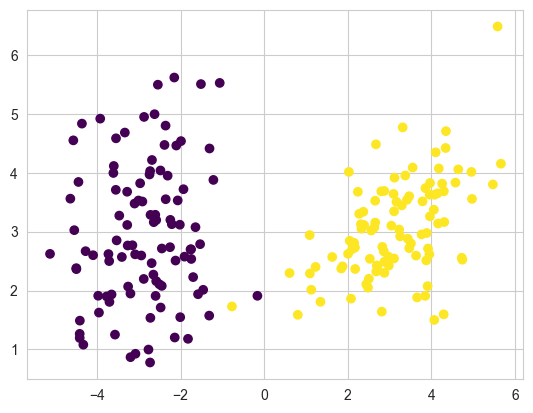

In [7]:
# Lasst uns zunächst die "Wahrheit" plotten, also die Datenpunkte mit 
# der Klasse, der sie in y zugeordnet werden (0 oder 1):
plt.scatter(X[:, 0],
			X[:, 1],
			c=y,
			cmap='viridis');

In [8]:
# Aufsplitten in Trainings- und Testdaten (Validierung sparen wir uns)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# KNN-Modell instantiieren (ein Objekt der Klasse erstellen)
# (Mit Hyperparameter n_neighbors standardmäßig auf 5 eingestellt)
knn = KNeighborsClassifier()

In [10]:
# Modell an Trainingsdaten trainieren:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Treffergenauigkeit (accuracy) bestimmen anhand des Testdatensatzes
# Sprich: Wie viele der Vorhersagen waren korrekt?
accuracy = knn.score(X_test, y_test)
print(f'Accuracy bei Testdaten in Höhe von: {accuracy:.3f}')

Accuracy bei Testdaten in Höhe von: 1.000


In [12]:
knn.score(X_train, y_train)

0.9866666666666667

In [13]:
# Anschauen, wie die vorhergesagten Cluster aussehen:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1])

In [14]:
y_test

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1])

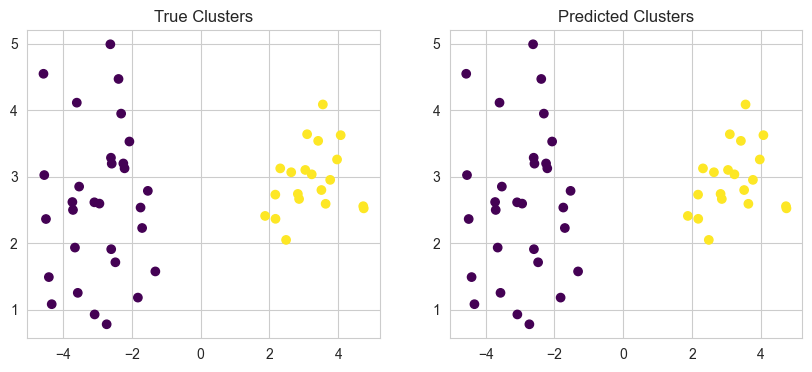

In [15]:
# Wahrheit und Vorhersage nebeneinander plotten:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(X_test[:, 0],
			X_test[:, 1],
			c=y_test,
			cmap='viridis')
ax1.set(title='True Clusters')

ax2.scatter(X_test[:, 0],
			X_test[:, 1],
			c=y_pred,
			cmap='viridis')
ax2.set(title='Predicted Clusters');

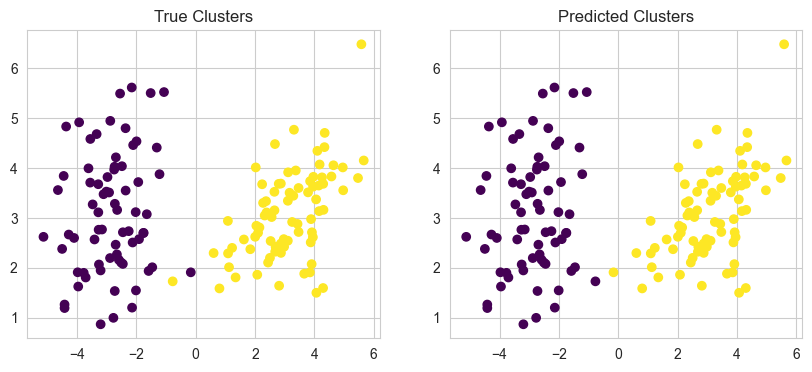

In [16]:
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

y_pred = knn.predict(X_train)

ax1.scatter(X_train[:, 0],
			X_train[:, 1],
			c=y_train,
			cmap='viridis')
ax1.set(title='True Clusters')

ax2.scatter(X_train[:, 0],
			X_train[:, 1],
			c=y_pred,
			cmap='viridis')
ax2.set(title='Predicted Clusters');

In [17]:
# Fazit: Ja, in diesem einfachen Fall war es tatsächlich möglich, alle Punkte
# korrekt zu bestimmen (bei den Testdaten!).

In [18]:
# Fall 2: Cluster mit Überschneidungen erzeugen (und danach mit KNN finden):
X, y = make_classification(
	n_samples=200,  # Stichprobengröße
	n_features=2,  # Anzahl der Variablen
	n_informative=2,  # Anzahl bedeutsamer Variablen
	n_redundant=0,  # Anzahl redundanter Variablen (kein Beitrag zu Clustern)
	n_classes=2,
	n_clusters_per_class=1,
	random_state=42,
	class_sep=1.7
)

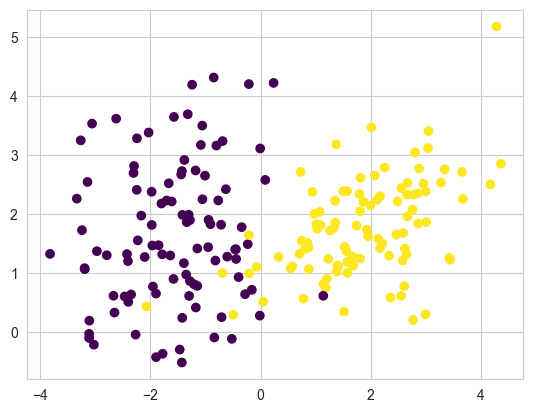

In [19]:
# Zunächst wieder der Plot der "wahren" Cluster (mit Labels):
plt.scatter(X[:, 0],
			X[:, 1],
			c=y,
			cmap='viridis');

In [20]:
# Quizfrage: Wird hier KNN funktionieren?
# Ja, aber nicht mehr so gut wahrscheinlich.

In [21]:
# Aufsplitten in Trainings- und Testdaten (Validierung sparen wir uns noch):
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
# Modelltraining:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# Modell-Performance:
knn_score = knn.score(X_test, y_test)
print('Accuracy bei Test:', knn_score)

Accuracy bei Test: 0.96


In [24]:
# Predictions als Array generieren:
y_pred = knn.predict(X_test)

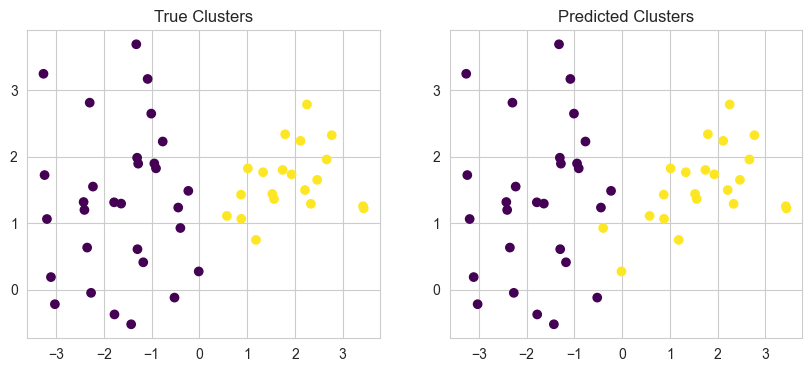

In [25]:
# Plotten von Testdaten mit Labels vs. Predictions:
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(X_test[:, 0],
			X_test[:, 1],
			c=y_test,
			cmap='viridis')
ax1.set(title='True Clusters')

ax2.scatter(X_test[:, 0],
			X_test[:, 1],
			c=y_pred,
			cmap='viridis')
ax2.set(title='Predicted Clusters');

In [26]:
# Quizfrage: Was ist denn hier passiert?
# Bei den beiden gelben Punkten ist die Nachbarschaft doch ganz "klar"!

In [27]:
# Das Modell hat von den Trainingsdaten und nicht von den Testdaten gelernt.
# Es wird immer Punkte nach ihrer Nähe zu Punkten bestimmen, wie sie in den Trainingsdaten
# vorlagen!

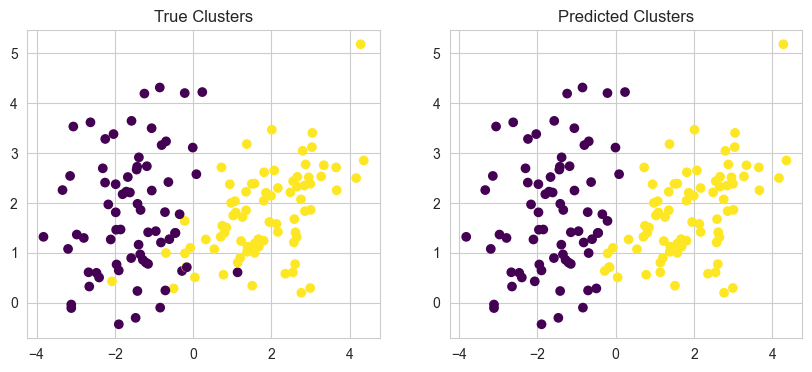

In [28]:
# Wie sieht das Clustering der Trainingsdaten aus? 
# Plotten von Trainingsdaten mit Labels vs. Predictions:
y_pred = knn.predict(X_train)

_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(X_train[:, 0],
			X_train[:, 1],
			c=y_train,
			cmap='viridis')
ax1.set(title='True Clusters')

ax2.scatter(X_train[:, 0],
			X_train[:, 1],
			c=y_pred,
			cmap='viridis')
ax2.set(title='Predicted Clusters');

In [29]:
# Mit Hyperparametern spielen. 
# Was für ein Ergebnis gibt es, wenn nur 2 nächste Nachbarn die Clusterzugehörigkeit bestimmen? 

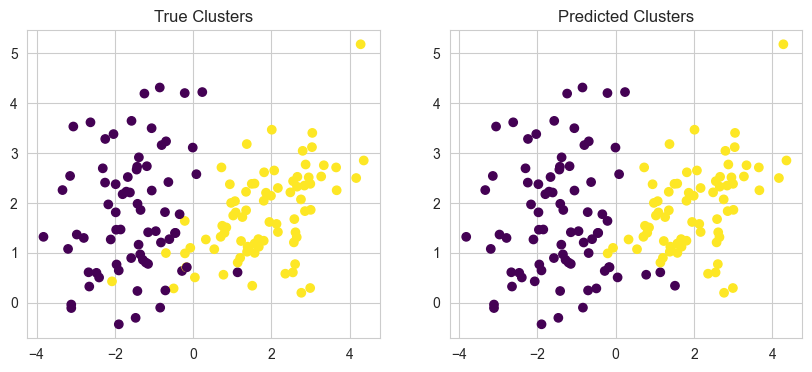

In [30]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(X_train[:, 0],
			X_train[:, 1],
			c=y_train,
			cmap='viridis')
ax1.set(title='True Clusters')

ax2.scatter(X_train[:, 0],
			X_train[:, 1],
			c=y_pred,
			cmap='viridis')
ax2.set(title='Predicted Clusters');

In [31]:
knn.score(X_train, y_train)

0.9466666666666667

In [32]:
# Bei welchem n macht unser Modell die beste Arbeit? (bzw. hat es die geringste Fehlerrate)
# Gridsearch mit for-Schleife

accuracy_rates = []

for i in range(1, 31):
	knn = KNeighborsClassifier(n_neighbors=i)
	X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
	knn.fit(X_train, y_train)
	accuracy = knn.score(X_test, y_test)
	accuracy_rates.append(accuracy)

In [33]:
accuracy_rates

[0.92,
 0.96,
 0.98,
 0.98,
 0.96,
 0.98,
 0.96,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.96,
 0.98,
 0.98,
 0.98,
 0.98,
 1.0,
 1.0,
 1.0,
 0.98,
 1.0,
 0.96,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 1.0]

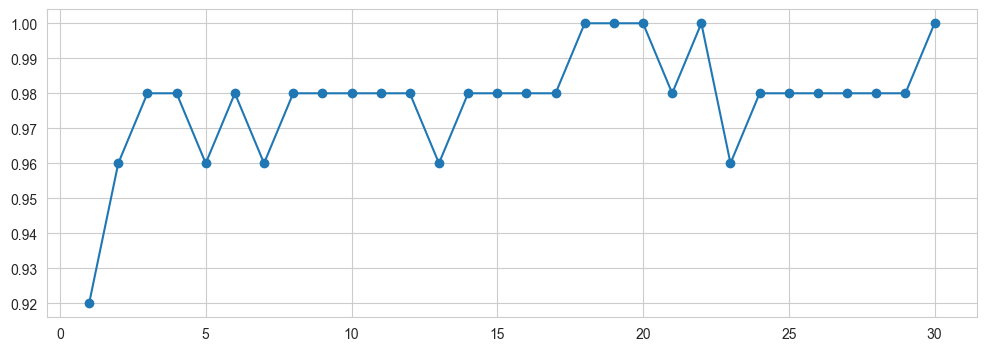

In [34]:
_, ax = plt.subplots(figsize=(12, 4))
ax.plot(range(1, 31), accuracy_rates, marker="o")

In [35]:
# Eigener Gridsearch mit For-Schleife
# Training mit verschiedenen k's und Vergleich der Fehlerraten
error_rates = []

for i in range(1, 31):
	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(X_train, y_train)
	error_rate = 1 - knn.score(X_test, y_test)
	error_rates.append(error_rate)

In [36]:
error_rates

[0.07999999999999996,
 0.040000000000000036,
 0.020000000000000018,
 0.020000000000000018,
 0.040000000000000036,
 0.020000000000000018,
 0.040000000000000036,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.040000000000000036,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.0,
 0.0,
 0.0,
 0.020000000000000018,
 0.0,
 0.040000000000000036,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.0]

In [37]:
np.arange(31)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

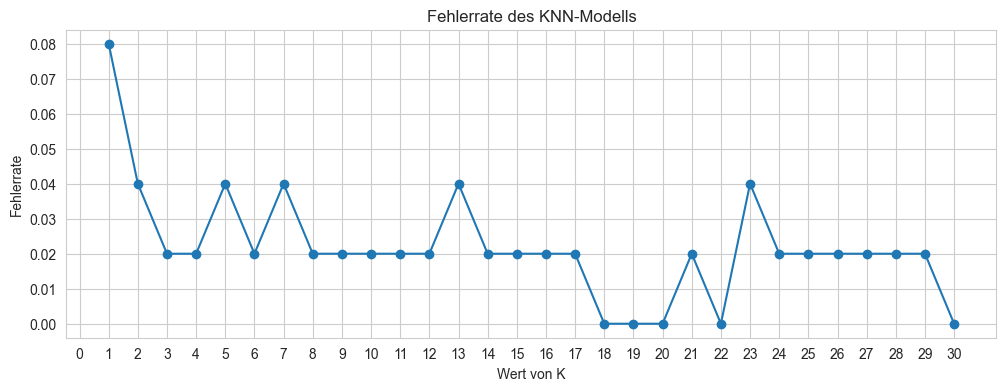

In [38]:
# Fehlerraten visualisieren und die besten sehen:
_, ax = plt.subplots(figsize=(12, 4))
ax.plot(range(1, 31), error_rates, marker='o')
plt.title("Fehlerrate des KNN-Modells")
plt.xlabel("Wert von K")
plt.ylabel("Fehlerrate")
plt.xticks(np.arange(31));

In [39]:
min(error_rates)

0.0

In [40]:
# Die besten n mit for-Schleife rausholen:
for i, error_rate in enumerate(error_rates):
	if error_rate == min(error_rates):
		print('Minimum at:', i + 1)

Minimum at: 18
Minimum at: 19
Minimum at: 20
Minimum at: 22
Minimum at: 30


In [41]:
# Dann lasst uns die Visualisierung für n=18 durchspielen!

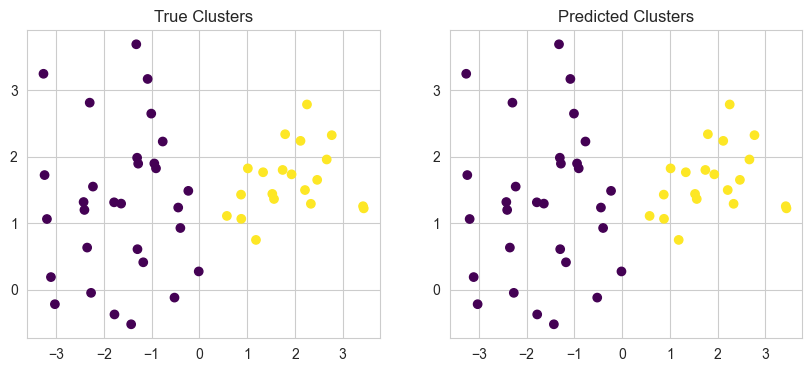

In [42]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(X_test[:, 0],
			X_test[:, 1],
			c=y_test,
			cmap='viridis')
ax1.set(title='True Clusters')

ax2.scatter(X_test[:, 0],
			X_test[:, 1],
			c=y_pred,
			cmap='viridis')
ax2.set(title='Predicted Clusters');

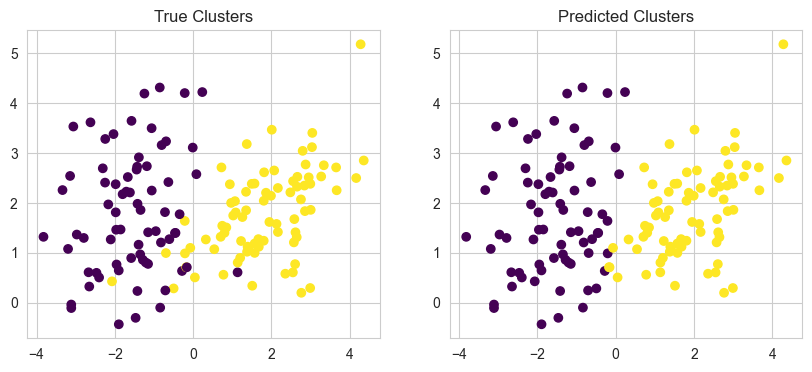

In [43]:
# Aber Vorsicht, das lag nur daran, dass Test so angenehm wenig Punkte hatte.
# Für die Trainingsdaten (mit viel mehr Punkten) sind die Cluster nicht ganz so perfekt.
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.scatter(X_train[:, 0],
			X_train[:, 1],
			c=y_train,
			cmap='viridis')

ax1.set(title='True Clusters')

ax2.scatter(X_train[:, 0],
			X_train[:, 1],
			c=y_pred,
			cmap='viridis')

ax2.set(title='Predicted Clusters');

# Jetzt wird es ernst: <br>Bestimmung der Gut-/Bösartigkeit von Tumoren

## Mit KNN: K-Nearest Neighbour (K-Nächste Nachbarn)

In [44]:
cancer = pd.read_csv('breast_cancer.csv', index_col='id')
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
# In der Spalte 'diagnosis' gibt es genau zwei Werte. 'M' und 'B'.
# Wir werden eine binäre Klassifikation durchführen, sodass das Modell neuen
# Datenpunkten 'M' oder 'B' zuordnet.
# Quizfrage: Wofür stehen diese Buchstaben eigentlich?
cancer['diagnosis'].unique()
# [B]enign > gutartig, [M]align > bösartig

array(['M', 'B'], dtype=object)

In [46]:
cancer['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [47]:
na_overview = cancer.isna().sum()
na_overview

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [48]:
na_overview[na_overview != 0]

Unnamed: 32    569
dtype: int64

In [49]:
cancer.drop('Unnamed: 32', axis=1, inplace=True)

In [50]:
na_overview = cancer.isna().sum()
na_overview[na_overview != 0]

Series([], dtype: int64)

In [51]:
X = cancer.select_dtypes('number')
y = cancer['diagnosis']

In [52]:
# Aufsplitten in Trainings-, Validierungs- und Testdaten
train_ratio = 0.8

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_ratio, random_state=0)

X_val, X_test, y_val, y_test = train_test_split(
	X_temp, y_temp,
	test_size=0.5, random_state=0
)

In [53]:
# Bonusaufgabe für die, die später Lust haben:
# Schreibt eine Funktion train_val_test!

In [54]:
# Modell trainieren
knn_cancer = KNeighborsClassifier(n_neighbors=5)
knn_cancer.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
# Treffergenauigkeit (accuracy) bestimmen anhand des Testdatensatzes
# Sprich: Wie viele der Vorhersagen waren korrekt?
test_score = knn_cancer.score(X_test, y_test)
print(f'Score für Test: {test_score:.3f}')

Score für Test: 0.912


In [56]:
# Und wie gut war die Genauigkeit beim Trainingsdatensatz?
train_score = knn_cancer.score(X_train, y_train)
print(f'Score für Train: {train_score:.3f}')

Score für Train: 0.949


In [57]:
# Quizfrage: Ende gut alles gut?
# Ist unser Modell perfekt, um in der Krebsdiagnostik zum Einsatz zu kommen?
# Bemerkung: Auf gar keinen Fall. Das sind zu viele falsche Krebsdiagnosen.
# Außerdem ist nicht bekannt, was hier falsch diagnostiziert wird.

In [58]:
# Übersicht über die verschiedenen (richtigen und falschen) Voraussagen 
# --> Confusion Matrix (zu Deutsch etwa: Matrix der Verwechslungen)
predictions = knn_cancer.predict(X_test)
predictions

array(['M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'M'], dtype=object)

In [59]:
y_test

id
86730502     M
906564       B
8510824      B
893783       B
9012795      M
90291        M
914862       B
912519       B
905978       B
909410       B
874662       B
927241       M
87556202     M
84862001     M
915186       B
925622       M
8910988      M
86355        M
894329       B
8711216      B
881046502    M
90439701     M
871149       B
846226       M
864877       M
921092       B
873586       B
8712291      B
879523       M
892214       B
8610404      M
892604       B
905557       B
90250        B
875938       M
922577       B
893526       B
869218       B
926424       M
91805        B
901011       B
84667401     M
90312        M
861648       B
906539       B
881094802    M
88199202     B
9112594      B
87139402     B
9112367      B
896839       M
845636       M
9010333      B
854941       B
87164        M
88206102     M
867739       M
Name: diagnosis, dtype: object

In [60]:
confusion_matrix(y_true=y_test, y_pred=predictions)

array([[30,  2],
       [ 3, 22]])

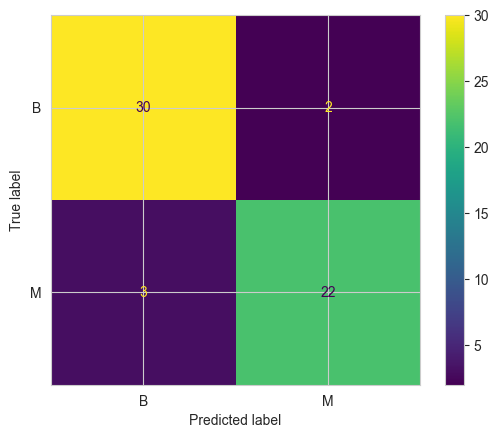

In [61]:
# Visuell ansprechender mit ConfusionMatrixDisplay:
ConfusionMatrixDisplay.from_predictions(
	y_true=y_test,
	y_pred=predictions
);

In [62]:
# Accuracy (R²) – Anteil richtiger Vorhersagen an Gesamtheit)
accuracy = (30 + 22) / len(y_test)
accuracy

0.9122807017543859

In [63]:
# Precision (Genauigkeit) – Anteil richtiger Positiver an richtig Positiven und falsch Positiven
# In unserem Fall:
# wirklich bösartige Tumoren / wirklich bösartige Tumoren + fälschlich als bösartig diagnostizierte gutartige Tumoren
precision_m = 22 / (22 + 2)
precision_m

0.9166666666666666

In [64]:
# Dasselbe für gutartige:
# wirklich gutartige Tumoren / wirklich gutartige Tumoren + fälschlich als gutartig diagnostizierte bösartige Tumoren
precision_b = 30 / (30 + 3)
precision_b

0.9090909090909091

In [65]:
# Recall (Sensitivität) – Anteil richtiger Positiver (böse) an richtig Positiven und falsch Negativen (eigentlich Tumoren)
recall_m = 22 / (22 + 3)
recall_m

0.88

In [66]:
recall_b = 30 / (30 + 2)
recall_b

0.9375

In [67]:
# f1-score – stellt das harmonische Mittel bei insbesondere unbalancierten Klassen her
f1_score_b = 2 * (precision_b * recall_b) / (precision_b + recall_b)
f1_score_b

0.923076923076923

In [68]:
f1_score_m = 2 * (precision_m * recall_m) / (precision_m + recall_m)
f1_score_m

0.8979591836734694

In [69]:
# Was ist die wichtigste Metrik für Krebsspezialisten?
# Und auf was sollten wir unser Modell trimmen?
# Recall von bösartigen Tumoren ist aktuell viel zu niedrig.
# Wir sollten möglichst keine falsch negativen Diagnosen (kein Krebs, obwohl bösartig)
# produzieren.

In [70]:
# Statt händisches Ausrechnen:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.91      0.94      0.92        32
           M       0.92      0.88      0.90        25

    accuracy                           0.91        57
   macro avg       0.91      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57



In [71]:
# EXKURS zu Korrelationen + Vorauswahl von Variablen

In [72]:
diag_dict = {'B': 0, 'M': 1}
cancer['diagnosis_binary'] = cancer['diagnosis'].map(diag_dict)

In [73]:
cancer.select_dtypes('number').corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_binary
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


In [74]:
cancer.select_dtypes('number').corr()['diagnosis_binary'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0